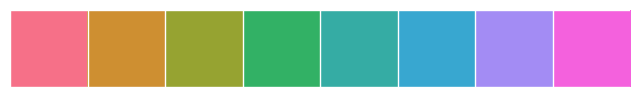

In [28]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))

In [29]:
smps=pd.read_csv('/Users/stella/Desktop/TSI 3031 Particle Counter_20170413.TXT',delimiter='\t',skiprows=4)

In [30]:
smps=smps.reset_index()
smps.columns=smps.iloc[0]
smps=smps.iloc[1:].reset_index()

In [31]:
smps.columns

Index(['index', 'id', 'start', 'end', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6',
       'status', 'bs', 'fs', 'dlimit', 'sheathflow', 'sheathtemperature',
       'sheathpressure', 'chargerflow', 'totalflow', 'chargervoltage',
       'chargercurrent', 'eadtemperature'],
      dtype='object', name=0)

In [32]:
smps

,index,id,start,end,ch1,ch2,ch3,ch4,ch5,ch6,...,fs,dlimit,sheathflow,sheathtemperature,sheathpressure,chargerflow,totalflow,chargervoltage,chargercurrent,eadtemperature
0,1,210868,2017-04-13 12:45:07,2017-04-13 12:59:37,8748.000,2974.000,81.000,73.000,254.000,17.000,...,0,1,20.000,26.000,94.000,433.000,650.000,2268.000,999.000,45.000
1,2,210869,2017-04-13 13:00:06,2017-04-13 13:14:36,9518.000,3887.000,216.000,39.000,218.000,15.000,...,0,1,20.000,27.000,94.000,433.000,651.000,2259.000,1001.000,45.000
2,3,210870,2017-04-13 13:15:06,2017-04-13 13:29:36,10216.000,4318.000,215.000,95.000,313.000,1.000,...,0,1,19.000,26.000,94.000,434.000,652.000,2259.000,1002.000,45.000
3,4,210871,2017-04-13 13:30:06,2017-04-13 13:44:36,11028.000,4295.000,232.000,205.000,399.000,0.000,...,0,1,19.000,27.000,94.000,432.000,649.000,2259.000,1003.000,45.000
4,5,210872,2017-04-13 13:45:07,2017-04-13 13:59:37,11412.000,6271.000,650.000,0.000,115.000,51.000,...,0,1,19.000,27.000,94.000,433.000,649.000,2259.000,1003.000,45.000
5,6,210873,2017-04-13 14:00:07,2017-04-13 14:14:37,9192.000,4621.000,392.000,0.000,106.000,46.000,...,0,1,19.000,27.000,94.000,433.000,650.000,2259.000,1004.000,45.000
6,7,210874,2017-04-13 14:15:07,2017-04-13 14:29:37,10926.000,5656.000,529.000,0.000,148.000,37.000,...,0,1,19.000,27.000,94.000,433.000,650.000,2258.000,1002.000,45.000
7,8,210875,2017-04-13 14:30:06,2017-04-13 14:44:36,9770.000,5866.000,652.000,0.000,70.000,59.000,...,0,1,20.000,27.000,94.000,432.000,648.000,2258.000,1004.000,45.000
8,9,210876,2017-04-13 14:45:06,2017-04-13 14:59:36,9500.000,5542.000,601.000,0.000,130.000,36.000,...,0,1,19.000,27.000,94.000,433.000,651.000,2258.000,1003.000,45.000
9,10,210877,2017-04-13 15:00:07,2017-04-13 15:14:37,7722.000,4086.000,379.000,0.000,202.000,23.000,...,0,1,19.000,26.000,94.000,433.000,650.000,2258.000,1002.000,45.000


In [33]:
del (smps['index'],smps['id'],smps['status'],smps['dlimit'],smps['bs'],smps['fs'],
    smps['sheathtemperature'],smps['sheathflow'],smps['sheathpressure'],smps['eadtemperature'])

In [34]:
#smps['sheathtemperature'].unique()
#smps['sheathflow'].unique()
#smps['sheathpressure'].unique()

In [35]:
smps['start']=smps['start'].apply(lambda x: parse(x))
smps['end']=smps['end'].apply(lambda x: parse(x))

In [36]:
smps['end'][0]-smps['start'][0]

Timedelta('0 days 00:14:30')

In [37]:
smps['end'][1]-smps['start'][1]

Timedelta('0 days 00:14:30')

In [38]:
smps['delta t']=smps['end']-smps['start']

In [39]:
# ch 1 : 20 - 30 nm
# ch 2 : 30 - 50
# ch 3 : 50 - 70
# ch 4 : 70 - 100
# ch 5 : 100 - 200
# ch 6 : 200+

In [40]:
smps=smps.rename(columns={'ch1':'ch1: 20-30 nm',
                          'ch2':'ch2: 30-50 nm',
                          'ch3':'ch3: 50-70 nm',
                          'ch4':'ch4: 70-100 nm',
                          'ch5':'ch5: 100-200 nm',
                          'ch6':'ch6: 200+ nm'})

In [41]:
del (smps['chargerflow'], smps['totalflow'], smps['chargervoltage'], smps['chargercurrent'])

In [42]:
smps.head()

,start,end,ch1: 20-30 nm,ch2: 30-50 nm,ch3: 50-70 nm,ch4: 70-100 nm,ch5: 100-200 nm,ch6: 200+ nm,delta t
0,2017-04-13 12:45:07,2017-04-13 12:59:37,8748.000,2974.000,81.000,73.000,254.000,17.000,00:14:30
1,2017-04-13 13:00:06,2017-04-13 13:14:36,9518.000,3887.000,216.000,39.000,218.000,15.000,00:14:30
2,2017-04-13 13:15:06,2017-04-13 13:29:36,10216.000,4318.000,215.000,95.000,313.000,1.000,00:14:30
3,2017-04-13 13:30:06,2017-04-13 13:44:36,11028.000,4295.000,232.000,205.000,399.000,0.000,00:14:30
4,2017-04-13 13:45:07,2017-04-13 13:59:37,11412.000,6271.000,650.000,0.000,115.000,51.000,00:14:30


In [48]:
smps['sum: 20-200+ nm']=(smps['ch1: 20-30 nm']+smps['ch2: 30-50 nm']+smps['ch3: 50-70 nm']
                        +smps['ch4: 70-100 nm']+smps['ch5: 100-200 nm']+smps['ch6: 200+ nm'])

In [43]:
smps['ch1: 20-30 nm']=smps['ch1: 20-30 nm'].apply(lambda x: np.float(x))
smps['ch2: 30-50 nm']=smps['ch2: 30-50 nm'].apply(lambda x: np.float(x))
smps['ch3: 50-70 nm']=smps['ch3: 50-70 nm'].apply(lambda x: np.float(x))
smps['ch4: 70-100 nm']=smps['ch4: 70-100 nm'].apply(lambda x: np.float(x))
smps['ch5: 100-200 nm']=smps['ch5: 100-200 nm'].apply(lambda x: np.float(x))
smps['ch6: 200+ nm']=smps['ch6: 200+ nm'].apply(lambda x: np.float(x))

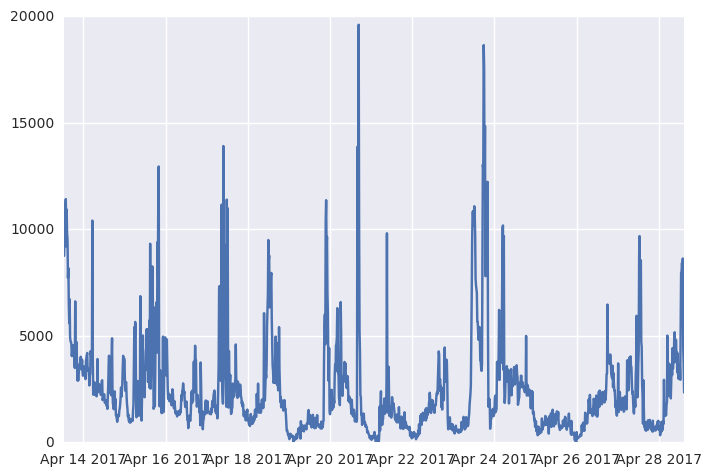

In [44]:
plt.plot(smps['start'],smps['ch1: 20-30 nm'])

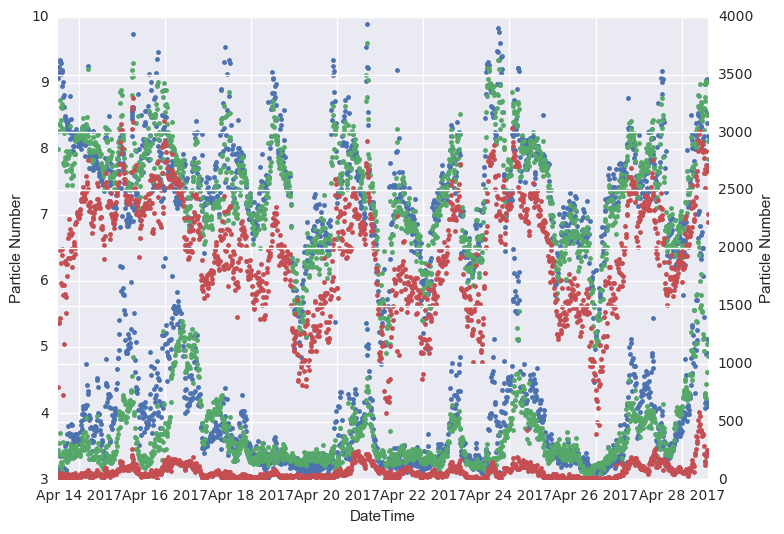

In [45]:
fig, ax1 = plt.subplots()
ax1.plot(smps['start'],np.log(smps['ch1: 20-30 nm']),'.',label='ch1: 20-30 nm')
ax1.plot(smps['start'],np.log(smps['ch2: 30-50 nm']),'.',label='ch2: 30-50 nm')
ax1.plot(smps['start'],np.log(smps['ch3: 50-70 nm']),'.',label='ch3: 50-70 nm')
ax1.set_xlabel('DateTime')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Particle Number')#, color='b')
#ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(smps['start'],smps['ch4: 70-100 nm'],'.',label='ch4: 70-100 nm')
ax2.plot(smps['start'],smps['ch5: 100-200 nm'],'.',label='ch5: 100-200 nm')
ax2.plot(smps['start'],smps['ch6: 200+ nm'],'.',label='ch6: 200+ nm')
ax2.set_ylabel('Particle Number')#, color='r')
#ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

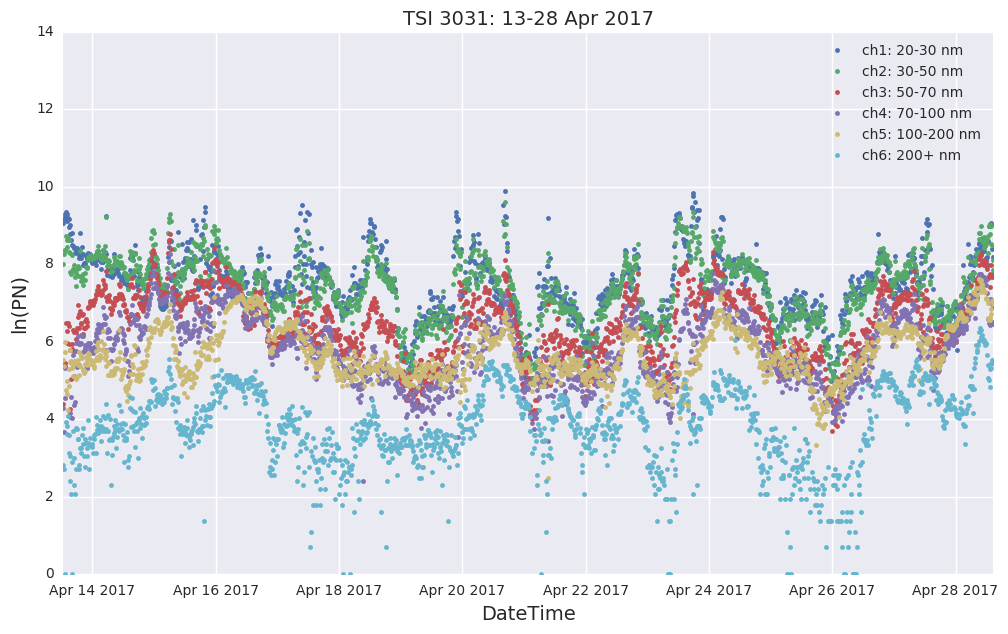

In [49]:
plt.figure(figsize=(12,7))
plt.plot(smps['start'],np.log(smps['ch1: 20-30 nm']),'.',label='ch1: 20-30 nm')
plt.plot(smps['start'],np.log(smps['ch2: 30-50 nm']),'.',label='ch2: 30-50 nm')
plt.plot(smps['start'],np.log(smps['ch3: 50-70 nm']),'.',label='ch3: 50-70 nm')
plt.plot(smps['start'],np.log(smps['ch4: 70-100 nm']),'.',label='ch4: 70-100 nm')
plt.plot(smps['start'],np.log(smps['ch5: 100-200 nm']),'.',label='ch5: 100-200 nm')
plt.plot(smps['start'],np.log(smps['ch6: 200+ nm']),'.',label='ch6: 200+ nm')
#plt.plot(smps['start'],smps['sum: 20-200+ nm'],color='r')
plt.legend()
plt.ylim(0,14)
plt.title('TSI 3031: 13-28 Apr 2017',fontsize=14)
plt.xlabel('DateTime',fontsize=14)
plt.ylabel('ln(PN)',fontsize=14)

(1.0, 1000000.0)

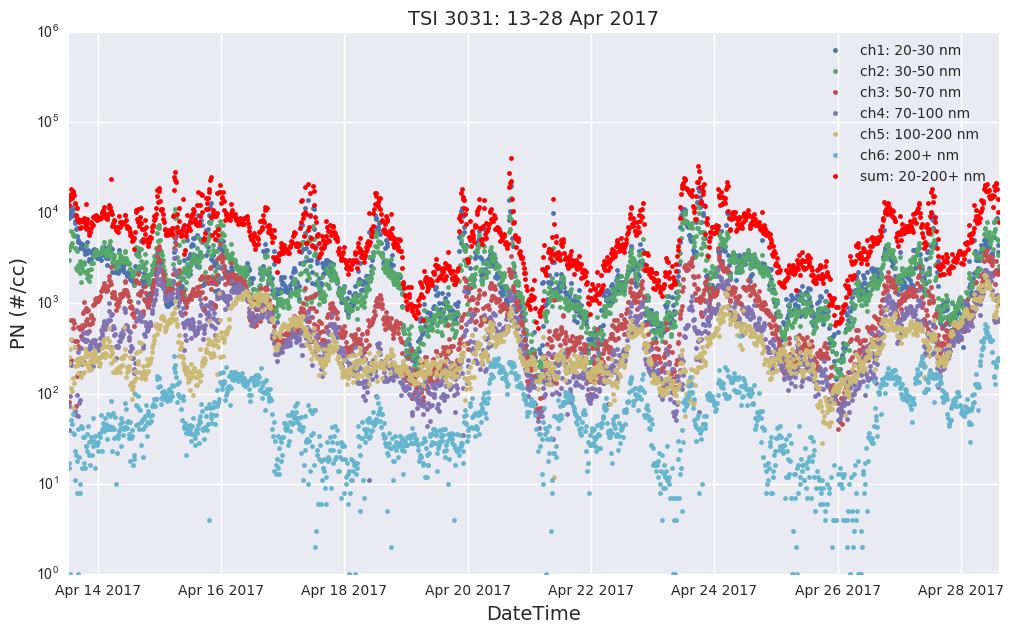

In [50]:
plt.figure(figsize=(12,7))
plt.semilogy(smps['start'],smps['ch1: 20-30 nm'],'.',label='ch1: 20-30 nm')
plt.semilogy(smps['start'],smps['ch2: 30-50 nm'],'.',label='ch2: 30-50 nm')
plt.semilogy(smps['start'],smps['ch3: 50-70 nm'],'.',label='ch3: 50-70 nm')
plt.semilogy(smps['start'],smps['ch4: 70-100 nm'],'.',label='ch4: 70-100 nm')
plt.semilogy(smps['start'],smps['ch5: 100-200 nm'],'.',label='ch5: 100-200 nm')
plt.semilogy(smps['start'],smps['ch6: 200+ nm'],'.',label='ch6: 200+ nm')
plt.semilogy(smps['start'],smps['sum: 20-200+ nm'],'.',color='r')
plt.legend()
plt.title('TSI 3031: 13-28 Apr 2017',fontsize=14)
plt.xlabel('DateTime',fontsize=14)
plt.ylabel('PN (#/cc)',fontsize=14)
#plt.yscale('log')
plt.ylim(0,10e5)
#plt.grid(True, which="both")
#plt.grid(True,which="minor",ls="-", color='0.65')
#plt.ticker.LogLocator(base=10.0, subs=(1.0, ), numdecs=4, numticks=None)

(1.0, 1000000.0)

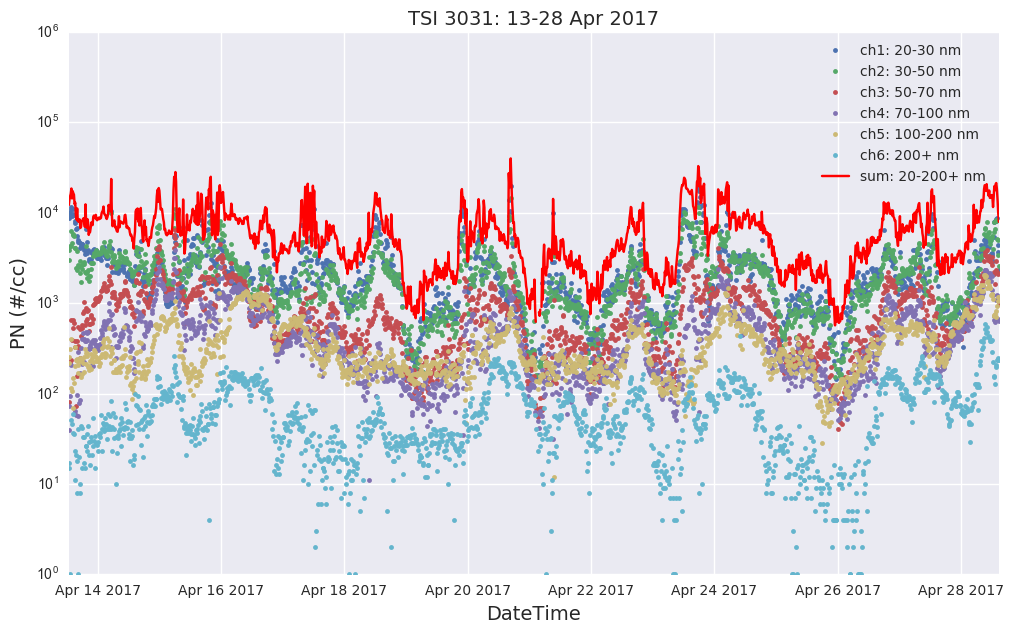

In [52]:
plt.figure(figsize=(12,7))
plt.semilogy(smps['start'],smps['ch1: 20-30 nm'],'.',label='ch1: 20-30 nm')
plt.semilogy(smps['start'],smps['ch2: 30-50 nm'],'.',label='ch2: 30-50 nm')
plt.semilogy(smps['start'],smps['ch3: 50-70 nm'],'.',label='ch3: 50-70 nm')
plt.semilogy(smps['start'],smps['ch4: 70-100 nm'],'.',label='ch4: 70-100 nm')
plt.semilogy(smps['start'],smps['ch5: 100-200 nm'],'.',label='ch5: 100-200 nm')
plt.semilogy(smps['start'],smps['ch6: 200+ nm'],'.',label='ch6: 200+ nm')
plt.semilogy(smps['start'],smps['sum: 20-200+ nm'],color='r')
plt.legend()
plt.title('TSI 3031: 13-28 Apr 2017',fontsize=14)
plt.xlabel('DateTime',fontsize=14)
plt.ylabel('PN (#/cc)',fontsize=14)
#plt.yscale('log')
plt.ylim(0,10e5)
#plt.grid(True, which="both")
#plt.grid(True,which="minor",ls="-", color='0.65')
#plt.ticker.LogLocator(base=10.0, subs=(1.0, ), numdecs=4, numticks=None)

In [58]:
smps['start'][0]

Timestamp('2017-04-13 12:45:07')

In [59]:
smps['end'][0]

Timestamp('2017-04-13 12:59:37')

In [60]:
ts1= pd.Timestamp('2017-04-13 12:59:37')/2

TypeError: unsupported operand type(s) for /: 'Timestamp' and 'int'

In [115]:
smps['delta t'][smps['delta t']!=smps['delta t'].unique()[0]]

30     00:14:29
64     00:14:29
96     00:14:29
153    00:14:31
157    00:14:31
159    00:14:31
161    00:14:29
232    00:14:29
246    00:14:31
278    00:14:29
298    00:14:29
302    00:14:31
315    00:14:31
390    00:14:29
397    00:14:31
407    00:14:31
423    00:14:29
424    00:14:29
433    00:14:29
444    00:14:29
528    00:14:31
534    00:14:29
544    00:14:29
555    00:14:29
578    00:14:29
589    00:14:31
597    00:14:31
614    00:14:31
685    00:14:29
694    00:14:31
         ...   
775    00:14:31
776    00:14:29
781    00:14:29
783    00:14:29
811    00:14:29
848    00:14:29
851    00:14:31
861    00:14:31
874    00:14:29
918    00:14:31
921    00:14:29
934    00:14:29
951    00:14:29
957    00:14:29
964    00:14:31
1009   00:14:29
1052   00:14:29
1098   00:14:31
1104   00:14:31
1206   00:14:29
1210   00:14:31
1261   00:14:29
1273   00:14:29
1289   00:14:29
1296   00:14:31
1331   00:14:31
1406   00:14:31
1419   00:14:29
1433   00:14:31
1434   00:14:31
Name: delta t, dtype: ti

In [70]:
from pandas.tslib import Timestamp
d1 = smps['start'][0]
# wait a few seconds
d2 = smps['end'][0]
d3 = d1 + (d2 - d1) / 2
# d3 will be the timestamp exactly in between d1 & d2

In [112]:
#print(np.float(smps['delta t'].unique()[0])/6e10)

(np.float(smps['delta t'].unique()[1])/6e10 - 14)*60
#print(np.float(smps['delta t'].unique()[2])/6e10)

28.99999999999995

In [116]:
pegasor=pd.read_csv('/Users/stella/Downloads/1329_PEGASOR A_20170502204239.csv',delimiter=',',skiprows=3).reset_index()

/Users/stella/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [117]:
pegasor.columns=pegasor.iloc[0]
pegasor=pegasor.iloc[1:].reset_index()

In [118]:
pegasor.columns

Index([            'index',          'DateTime',  'MEASURE_PA_LABEL',
        'MEASURE_MG_LABEL',   'MEASURE_N_LABEL',       'PAMBT_LABEL',
          'PAMBRHUM_LABEL',   'ZEROLEVEL_LABEL',     'CORONAI_LABEL',
           'CORONAU_LABEL',    'PCORSTAB_LABEL',   'PCORSTABM_LABEL',
             'TRAPU_LABEL',    'PROCTEMP_LABEL',       'STEMP_LABEL',
         'INLETTEMP_LABEL', 'ELECINTTEMP_LABEL',   'PFILPRESS_LABEL',
         'PSYSPRESS_LABEL', 'PCHASFANRPM_LABEL',        'ENCLOSTEMP',
        'MEASURE_PA_LABEL',  'MEASURE_MG_LABEL',   'MEASURE_N_LABEL',
             'PAMBT_LABEL',    'PAMBRHUM_LABEL',   'ZEROLEVEL_LABEL',
           'CORONAI_LABEL',     'CORONAU_LABEL',    'PCORSTAB_LABEL',
         'PCORSTABM_LABEL',       'TRAPU_LABEL',    'PROCTEMP_LABEL',
             'STEMP_LABEL',   'INLETTEMP_LABEL', 'ELECINTTEMP_LABEL',
         'PFILPRESS_LABEL',   'PSYSPRESS_LABEL', 'PCHASFANRPM_LABEL',
        'MEASURE_PA_LABEL',  'MEASURE_MG_LABEL',   'MEASURE_N_LABEL',
             'PAMBT_

In [119]:
del pegasor['index'],pegasor['PAMBT_LABEL'],pegasor['ZEROLEVEL_LABEL'],pegasor['CORONAI_LABEL'],pegasor['CORONAU_LABEL']
del pegasor['PCORSTAB_LABEL'], pegasor['PCORSTABM_LABEL'],pegasor['ELECINTTEMP_LABEL']
del pegasor['PAMBRHUM_LABEL'],pegasor['MEASURE_N_LABEL'],pegasor['MEASURE_PA_LABEL']
del pegasor['PFILPRESS_LABEL'],pegasor['PSYSPRESS_LABEL'],pegasor['PCHASFANRPM_LABEL'],pegasor['ENCLOSTEMP']
del pegasor['TRAPU_LABEL'],pegasor['PROCTEMP_LABEL'],pegasor['STEMP_LABEL'],pegasor['INLETTEMP_LABEL']

In [120]:
smps['delta t'].unique()

array([870000000000, 869000000000, 871000000000], dtype='timedelta64[ns]')

In [121]:
smps['start'].head()

0   2017-04-13 12:45:07
1   2017-04-13 13:00:06
2   2017-04-13 13:15:06
3   2017-04-13 13:30:06
4   2017-04-13 13:45:07
Name: start, dtype: datetime64[ns]

In [122]:
pegasor.head()

,DateTime,MEASURE_MG_LABEL,MEASURE_MG_LABEL,MEASURE_MG_LABEL,nan
0,4/13/2017 00:00,69275.665,41631.462,73347.542,NaN
1,4/13/2017 00:01,69275.665,41631.462,68192.162,NaN
2,4/13/2017 00:02,69275.665,39071.659,68192.162,NaN
3,4/13/2017 00:03,69275.665,39071.659,63790.638,NaN
4,4/13/2017 00:04,65806.839,39180.557,63790.638,NaN


In [123]:
pegasor['DateTime']=pegasor['DateTime'].apply(lambda x: parse(x))

In [124]:
pegasor[pegasor['DateTime']>smps['start'][0]]

,DateTime,MEASURE_MG_LABEL,MEASURE_MG_LABEL,MEASURE_MG_LABEL,nan
766,2017-04-13 12:46:00,154025.543,81934.456,147746.704,NaN
767,2017-04-13 12:47:00,154025.543,81934.456,178689.987,NaN
768,2017-04-13 12:48:00,154025.543,85902.443,178689.987,NaN
769,2017-04-13 12:49:00,158370.193,85902.443,163609.299,NaN
770,2017-04-13 12:50:00,158370.193,83718.887,163609.299,NaN
771,2017-04-13 12:51:00,158370.193,83718.887,157076.920,NaN
772,2017-04-13 12:52:00,158370.193,79221.222,157076.920,NaN
773,2017-04-13 12:53:00,158370.193,79221.222,149692.932,NaN
774,2017-04-13 12:54:00,148720.322,78079.277,149692.932,NaN
775,2017-04-13 12:55:00,148720.322,78079.277,165453.568,NaN


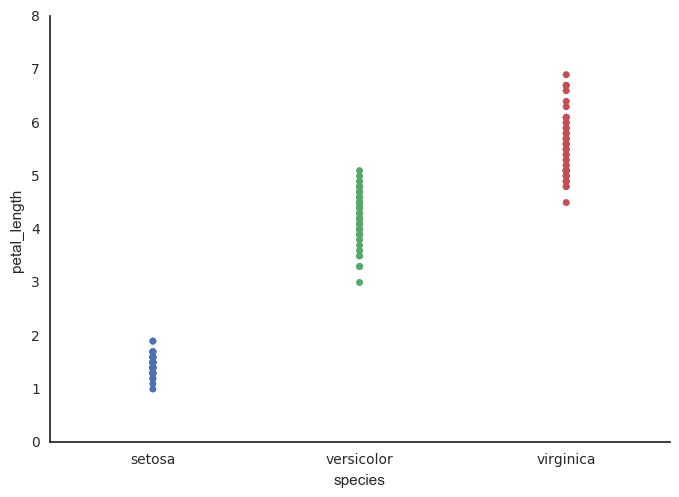

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

iris = sns.load_dataset('iris')
sns.set(style="white", color_codes=True)
sns.stripplot(x='species', y='petal_length', data=iris)
sns.despine()

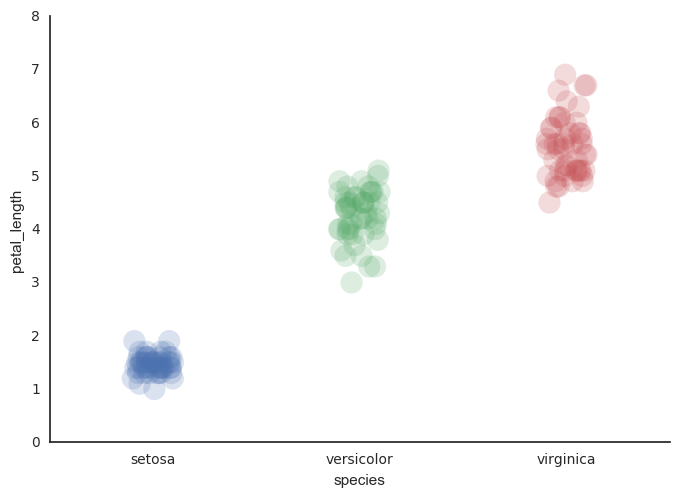

In [78]:
sns.stripplot(x='species', y='petal_length', data=iris,   
              size=16, alpha=.2, jitter=True, edgecolor='none')
sns.despine()